# **AI-Generated Personal Finance Assistant **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/content/synthetic_personal_finance_dataset.csv")
df.head()

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date
0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,NaN,0.00,0,0.00,0.00,0.00,430,8.68,Other,2024-01-09
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,Education,146323.34,36,4953.50,13.33,1.40,543,6.16,North America,2022-02-13
2,U00003,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,No,NaN,0.00,0,0.00,0.00,0.00,754,6.87,Africa,2022-05-12
3,U00004,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,Yes,Business,93242.37,24,4926.57,23.93,0.84,461,4.31,Europe,2023-10-02
4,U00005,53,Female,PhD,Employed,Student,5128.93,4137.61,461509.48,No,NaN,0.00,0,0.00,0.00,0.00,516,7.50,Africa,2021-08-07


In [4]:
# Convert 'record_date' to datetime objects
df['record_date'] = pd.to_datetime(df['record_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32424 entries, 0 to 32423
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  32424 non-null  object        
 1   age                      32424 non-null  int64         
 2   gender                   32424 non-null  object        
 3   education_level          32424 non-null  object        
 4   employment_status        32424 non-null  object        
 5   job_title                32424 non-null  object        
 6   monthly_income_usd       32424 non-null  float64       
 7   monthly_expenses_usd     32424 non-null  float64       
 8   savings_usd              32424 non-null  float64       
 9   has_loan                 32424 non-null  object        
 10  loan_type                12995 non-null  object        
 11  loan_amount_usd          32424 non-null  float64       
 12  loan_term_months         32424 n

In [5]:
df.describe()

,age,monthly_income_usd,monthly_expenses_usd,savings_usd,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,record_date
count,32424.000000,32424.000000,32424.000000,3.242400e+04,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000,32424
mean,43.415865,4027.863185,2419.444709,2.437520e+05,100114.735992,58.500000,3092.992339,6.616332,1.194881,575.260424,5.045431,2023-07-24 02:38:14.300518144
min,18.000000,500.000000,150.010000,6.359600e+02,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.100000,2021-07-23 00:00:00
25%,30.000000,2657.795000,1397.497500,8.629155e+04,0.000000,0.000000,0.000000,0.000000,0.000000,437.000000,2.580000,2022-07-22 00:00:00
50%,43.000000,3997.740000,2219.575000,2.017003e+05,0.000000,0.000000,0.000000,0.000000,0.000000,575.000000,5.040000,2023-07-24 00:00:00
75%,56.000000,5351.607500,3254.037500,3.589662e+05,189499.070000,60.000000,3574.567500,13.140000,0.920000,714.000000,7.510000,2024-07-22 00:00:00
max,69.000000,12404.050000,10082.710000,1.237774e+06,499954.750000,360.000000,47723.840000,30.000000,90.670000,850.000000,10.000000,2025-07-22 00:00:00
std,14.978246,1916.773353,1388.893084,1.915772e+05,152536.588635,104.865373,6478.939776,9.472964,3.761964,159.023227,2.851344,NaN


In [6]:
# Mean savings_to_income_ratio group by age, gender, education lvl and job
df_savings_age = df.groupby("age").agg({"savings_to_income_ratio":"mean"})
df_savings_gender = df.groupby("gender").agg({"savings_to_income_ratio":"mean"}).reset_index()
df_savings_ed_lvl = df.groupby("education_level").agg({"savings_to_income_ratio":"mean"})
df_savings_job = df.groupby("job_title").agg({"savings_to_income_ratio":"mean"})

In [7]:
#Print resoult
print("Mean savings_to_income_ratio for gender")
print(df_savings_gender)
print("-"*50)
print("Mean savings_to_income_ratio for education_level")
print(df_savings_ed_lvl)
print("-"*50)
print("Mean savings_to_income_ratio for job")
print(df_savings_job)

Mean savings_to_income_ratio for gender
   gender  savings_to_income_ratio
0  Female                 5.033888
1    Male                 5.054223
2   Other                 5.078561
--------------------------------------------------
Mean savings_to_income_ratio for education_level
                 savings_to_income_ratio
education_level                         
Bachelor                        5.061121
High School                     5.015671
Master                          5.041157
Other                           4.936096
PhD                             5.171136
--------------------------------------------------
Mean savings_to_income_ratio for job
             savings_to_income_ratio
job_title                           
Accountant                  5.068034
Doctor                      5.093264
Driver                      5.037231
Engineer                    5.093128
Manager                     5.098257
Salesperson                 4.976409
Student                     4.983095
Teacher     

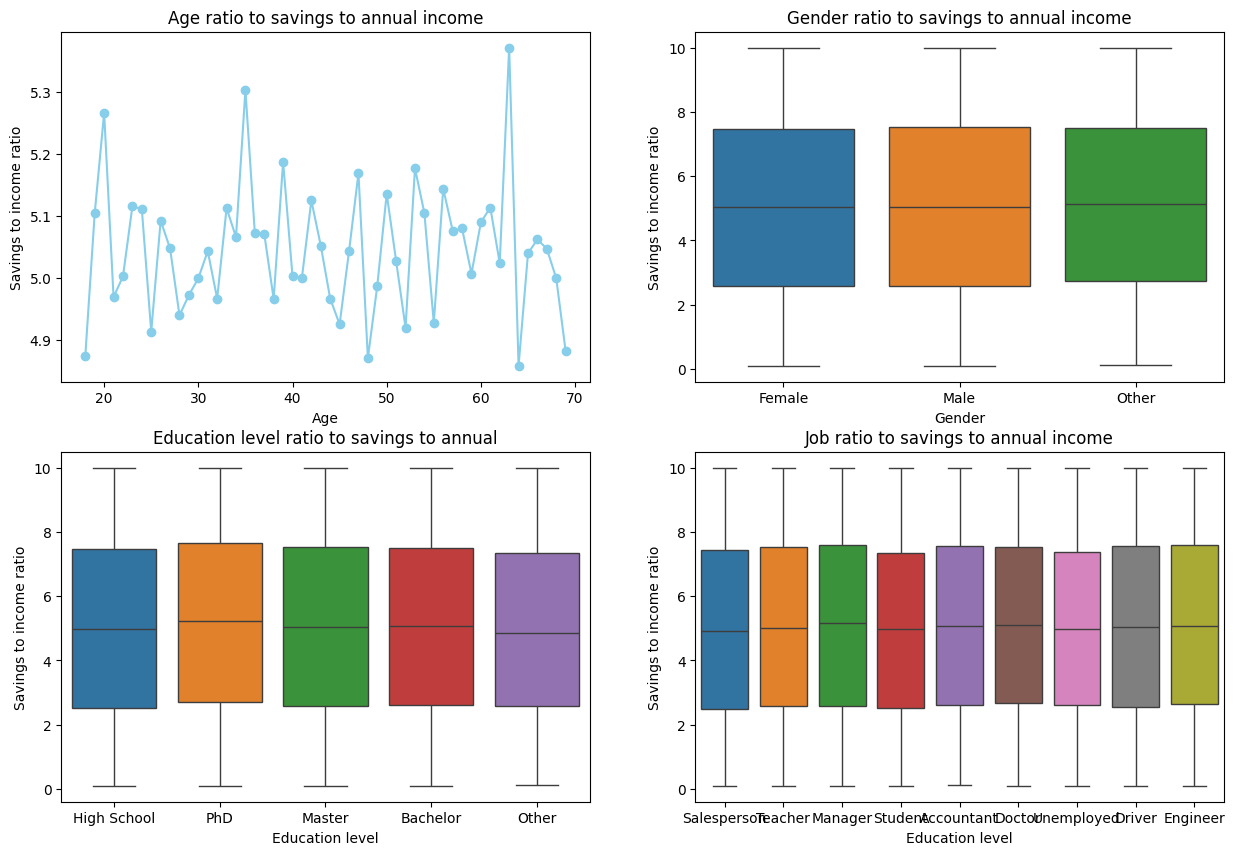

In [8]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
ax1 = ax[0, 0]
ax2 = ax[0, 1]
ax3 = ax[1, 0]
ax4 = ax[1, 1]

#Create plot age ratio to savings to annual income
ax1.plot(df_savings_age.index, df_savings_age['savings_to_income_ratio'], color = "skyblue", marker="o")
ax1.set_title("Age ratio to savings to annual income")
ax1.set_xlabel("Age")
ax1.set_ylabel("Savings to income ratio")

#Create plot gender ratio to savings to annual income
sns.boxplot(data=df, x= "gender", y= "savings_to_income_ratio",palette="tab10" ,ax=ax2, hue= "gender")
ax2.set_title("Gender ratio to savings to annual income")
ax2.set_xlabel("Gender")
ax2.set_ylabel("Savings to income ratio")

#Create plot education level ratio to savings to annual income
sns.boxplot(data=df, x= "education_level", y= "savings_to_income_ratio",palette="tab10" ,ax=ax3,  hue= "education_level")
ax3.set_title("Education level ratio to savings to annual")
ax3.set_xlabel("Education level")
ax3.set_ylabel("Savings to income ratio")

#Create plot job ratio ratio to savings to annual income
sns.boxplot(data=df, x= "job_title", y= "savings_to_income_ratio",palette="tab10" ,ax=ax4, hue= "job_title")
ax4.set_title("Job ratio to savings to annual income")
ax4.set_xlabel("Education level")
ax4.set_ylabel("Savings to income ratio")

plt.show()

In [9]:

# --- 1. Savings Rate (%) ---
# Measures what percentage of income is saved
df['Savings_Rate'] = (df['savings_usd'] / df['monthly_income_usd']) * 100

# --- 2. Debt-to-Income Ratio (%) ---
# Measures how much debt relative to income
df['Debt_to_Income_Ratio'] = (df['loan_amount_usd'] / df['monthly_income_usd']) * 100

# --- 3. Monthly Balance ---
# Income left after expenses
df['Monthly_Balance'] = df['monthly_income_usd'] - df['monthly_expenses_usd']

# --- 4. Expense Ratio ---
# Measures what percentage of income is spent
df['Expense_Ratio'] = (df['monthly_expenses_usd'] / df['monthly_income_usd']) * 100

# --- 5. Categorize Financial Health (Example Target Variable) ---
# Simple classification: Good, Average, Poor
def classify_financial_health(row):
    if row['Savings_Rate'] >= 20 and row['Debt_to_Income_Ratio'] < 30:
        return "Good"
    elif row['Savings_Rate'] >= 10 and row['Debt_to_Income_Ratio'] < 50:
        return "Average"
    else:
        return "Poor"

df['Financial_Health'] = df.apply(classify_financial_health, axis=1)

# Check new features
print(df.head())

  user_id  age  gender education_level employment_status    job_title  \
0  U00001   56  Female     High School     Self-employed  Salesperson   
1  U00002   19  Female             PhD          Employed  Salesperson   
2  U00003   20  Female          Master          Employed      Teacher   
3  U00004   25    Male             PhD          Employed      Manager   
4  U00005   53  Female             PhD          Employed      Student   

   monthly_income_usd  monthly_expenses_usd  savings_usd has_loan  ...  \
0             3531.69               1182.59    367655.03       No  ...   
1             3531.73               2367.99    260869.10      Yes  ...   
2             2799.49               1003.91    230921.21       No  ...   
3             5894.88               4440.12    304815.51      Yes  ...   
4             5128.93               4137.61    461509.48       No  ...   

  debt_to_income_ratio  credit_score  savings_to_income_ratio         region  \
0                 0.00           430

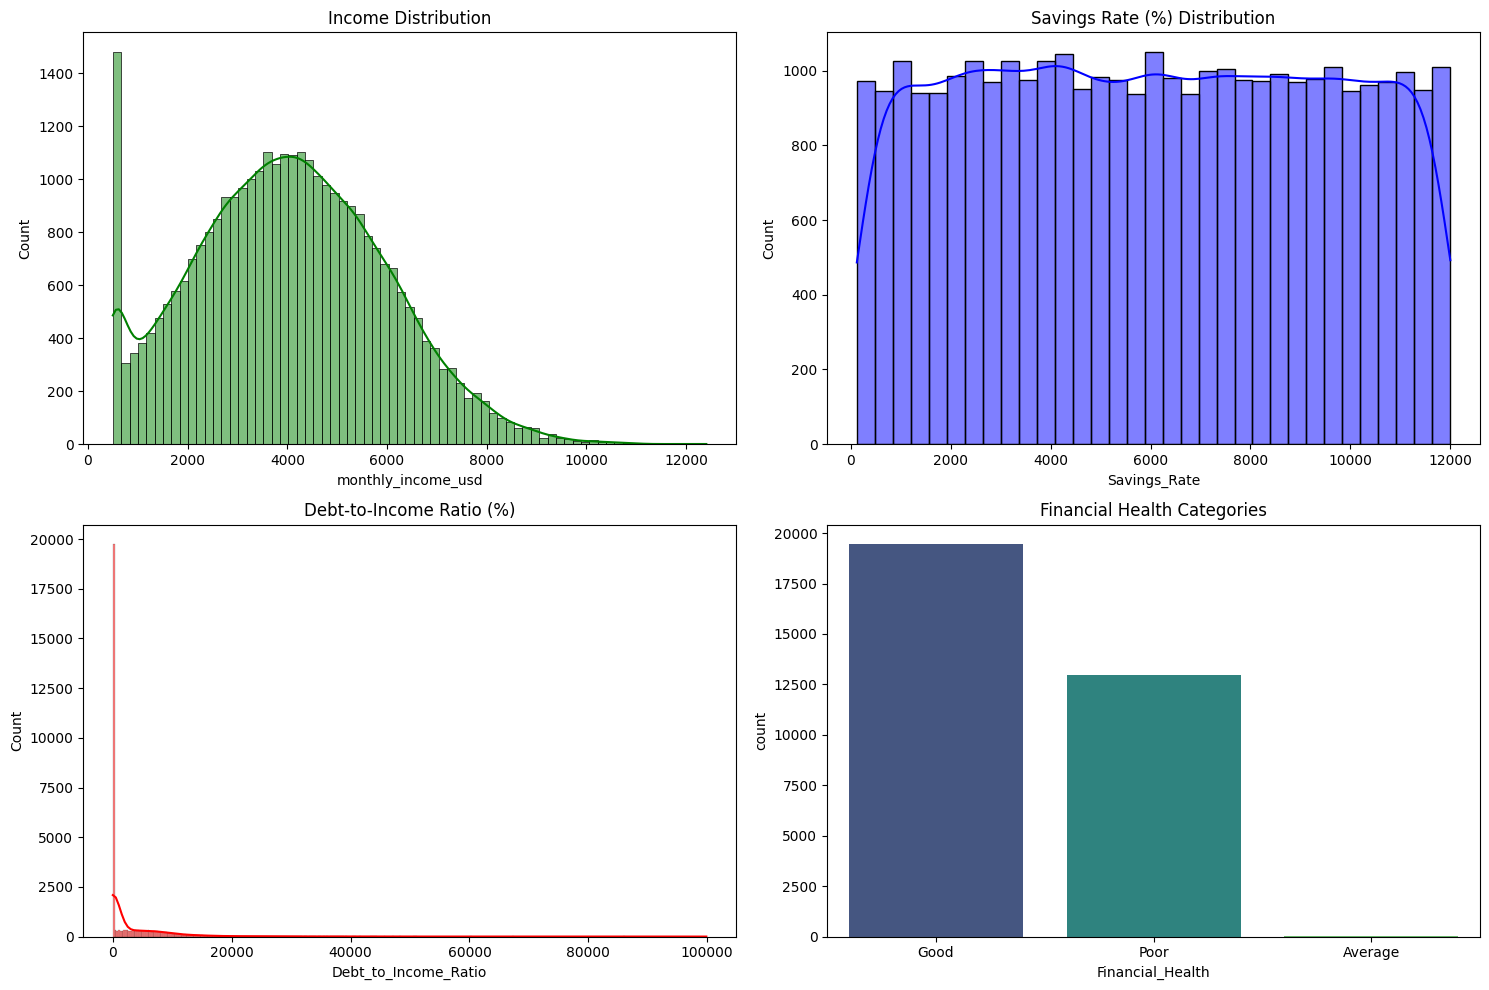

In [10]:
# ---------- Visualization ----------
plt.figure(figsize=(15, 10))

# 1. Income Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['monthly_income_usd'], kde=True, color='green')
plt.title("Income Distribution")

# 2. Savings Rate Distribution
plt.subplot(2, 2, 2)
sns.histplot(df['Savings_Rate'], kde=True, color='blue')
plt.title("Savings Rate (%) Distribution")

# 3. Debt-to-Income Ratio Distribution
plt.subplot(2, 2, 3)
sns.histplot(df['Debt_to_Income_Ratio'], kde=True, color='red')
plt.title("Debt-to-Income Ratio (%)")

# 4. Financial Health Count
plt.subplot(2, 2, 4)
sns.countplot(x='Financial_Health', data=df, palette='viridis')
plt.title("Financial Health Categories")

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Debt To Income Ratio')

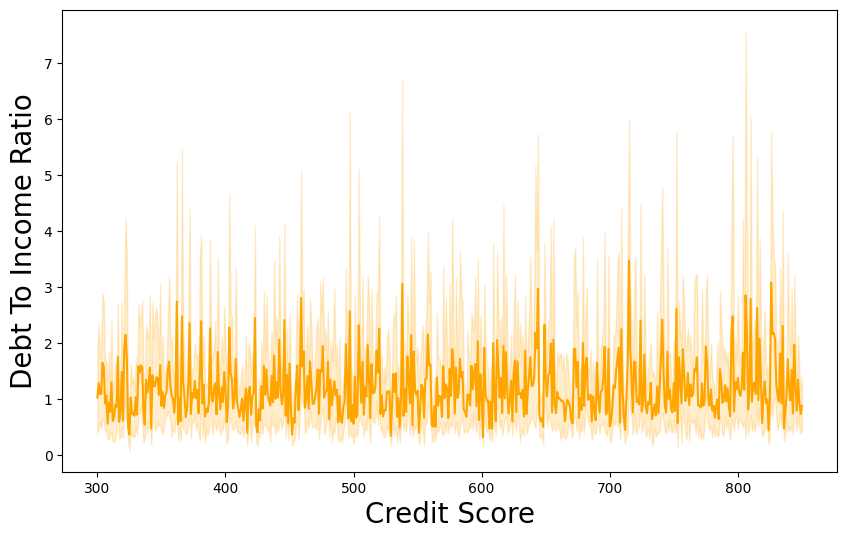

In [11]:
# Plot Credit score to debt to income ratio
plt.figure(figsize=(10,6))
sns.lineplot(data= df, x = "credit_score", y="debt_to_income_ratio", color = "orange")
plt.xlabel("Credit Score", fontsize= 20)
plt.ylabel("Debt To Income Ratio", fontsize= 20)

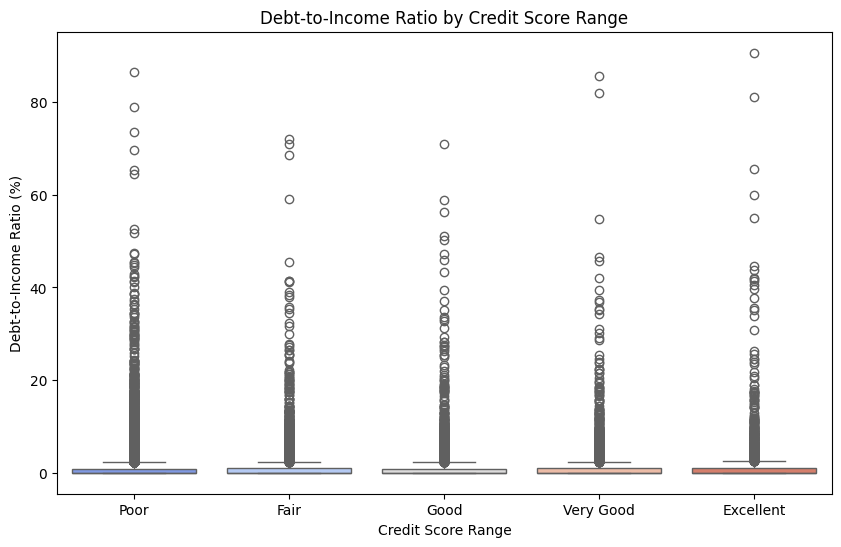

In [12]:
# Create bins for credit score ranges
bins = [300, 580, 670, 740, 800, 850]
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
df['credit_score_range'] = pd.cut(df['credit_score'], bins=bins, labels=labels)

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="credit_score_range", y="debt_to_income_ratio", palette="coolwarm")
plt.title("Debt-to-Income Ratio by Credit Score Range")
plt.xlabel("Credit Score Range")
plt.ylabel("Debt-to-Income Ratio (%)")
plt.show()


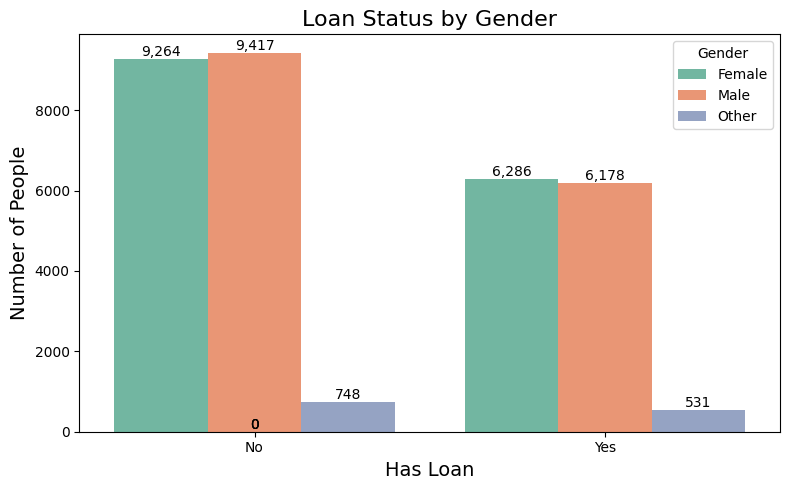

In [13]:
# Group by loan status and gender
loan_gender_counts = df.groupby(['has_loan', 'gender']).size().reset_index(name='count')

# Plot grouped bar chart
plt.figure(figsize=(8,5))
sns.barplot(data=loan_gender_counts, x='has_loan', y='count', hue='gender', palette='Set2')

# Labels and title
plt.title("Loan Status by Gender", fontsize=16)
plt.xlabel("Has Loan", fontsize=14)
plt.ylabel("Number of People", fontsize=14)

# Display counts on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(format(int(p.get_height()), ','),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.legend(title='Gender')
plt.tight_layout()
plt.show()


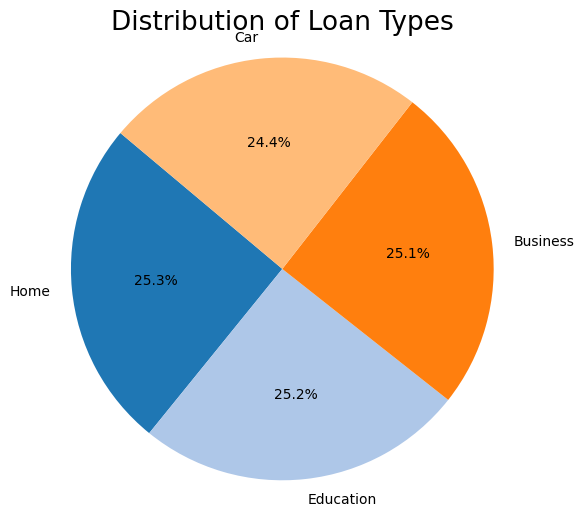

In [14]:
# Filter for specific loan types
type_cr = ['Education', 'Business', 'Car', 'Home']
filtered = df[df["loan_type"].isin(type_cr)]

# Count the occurrences of each loan type
loan_counts = filtered["loan_type"].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("tab20"))
plt.title("Distribution of Loan Types", fontsize=19)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

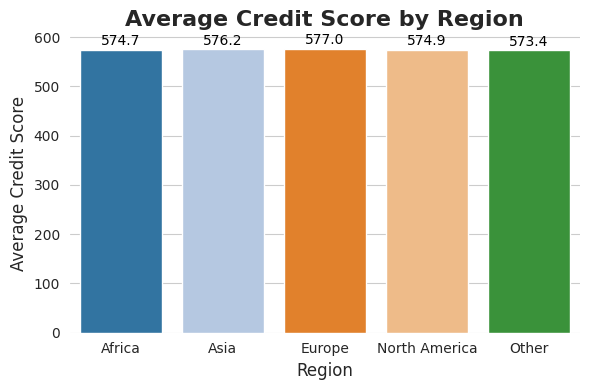

In [15]:
# Calculate mean credit score by region
mean_cred_reg = df.groupby("region").agg({"credit_score": "mean"}).reset_index()

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))

# Bar plot - removed hue='country'
ax = sns.barplot(
    data=mean_cred_reg,
    x="region",
    y="credit_score",
    palette="tab20",
    dodge=False
)

# Title & labels
plt.title("Average Credit Score by Region", fontsize=16, fontweight='bold')
plt.xlabel("Region", fontsize=12)
plt.ylabel("Average Credit Score", fontsize=12)

# Annotate bars with values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 6),
                textcoords='offset points',
                fontsize=10, color='black')

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [16]:
#Creat category peoples for age
def category_people(age):
    if age < 25:
        return "Youth"
    elif age < 60:
        return "Adult"
    else:
        return "Senior"

df["category_people"] = df['age'].apply(category_people)
age_gender_counts = df.groupby(['category_people', 'gender']).size().reset_index(name='count')
age_gender_counts

,category_people,gender,count
0,Adult,Female,10547
1,Adult,Male,10483
2,Adult,Other,887
3,Senior,Female,2941
4,Senior,Male,3016
5,Senior,Other,226
6,Youth,Female,2062
7,Youth,Male,2096
8,Youth,Other,166


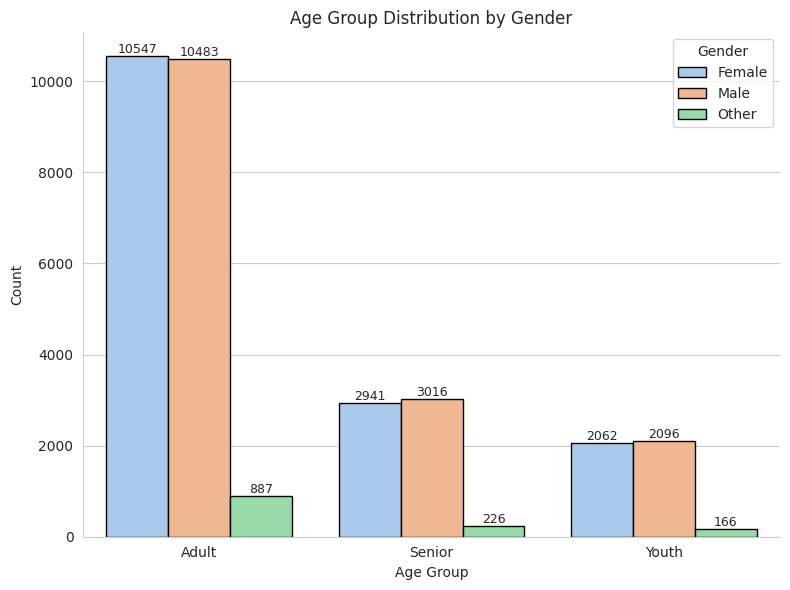

In [17]:
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=age_gender_counts,
    x='category_people', y='count', hue='gender',
    palette='pastel', edgecolor='black'
)

# Title & labels
ax.set(title="Age Group Distribution by Gender", xlabel="Age Group", ylabel="Count")
plt.legend(title="Gender", frameon=True)

# Add labels on bars
for c in ax.containers:
    ax.bar_label(c, fmt='%d', fontsize=9)

sns.despine()
plt.tight_layout()
plt.show()


# **LOAN PREDICTIONS**

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32424 entries, 0 to 32423
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  32424 non-null  object        
 1   age                      32424 non-null  float64       
 2   gender                   32424 non-null  object        
 3   education_level          32424 non-null  int64         
 4   employment_status        32424 non-null  int64         
 5   job_title                32424 non-null  int64         
 6   monthly_income_usd       32424 non-null  float64       
 7   monthly_expenses_usd     32424 non-null  float64       
 8   savings_usd              32424 non-null  float64       
 9   has_loan                 32424 non-null  object        
 10  loan_type                32424 non-null  int64         
 11  loan_amount_usd          32424 non-null  float64       
 12  loan_term_months         32424 n

In [56]:
df.head()

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,...,savings_to_income_ratio,region,record_date,Savings_Rate,Debt_to_Income_Ratio,Monthly_Balance,Expense_Ratio,Financial_Health,credit_score_range,category_people
0,U00001,0.840174,Female,1,1,5,-0.258863,-0.890546,0.646762,No,...,1.274706,4,2024-01-09,10410.172750,0.000000,2349.10,33.485102,1,Poor,Adult
1,U00002,-1.630114,Female,4,0,5,-0.258842,-0.037048,0.089350,Yes,...,0.390899,3,2022-02-13,7386.439507,4143.106636,1163.74,67.049010,2,Poor,Youth
2,U00003,-1.563349,Female,2,0,7,-0.640865,-1.019198,-0.066976,No,...,0.639908,0,2022-05-12,8248.688511,0.000000,1795.58,35.860460,1,Very Good,Youth
3,U00004,-1.229526,Male,4,0,4,0.974057,1.454904,0.318746,Yes,...,-0.257928,2,2023-10-02,5170.851824,1581.751791,1454.76,75.321635,2,Poor,Adult
4,U00005,0.639880,Female,4,0,6,0.574447,1.237094,1.136674,No,...,0.860860,0,2021-08-07,8998.162970,0.000000,991.32,80.671992,1,Poor,Adult


In [57]:
numeric = [
    "age", "monthly_income_usd", "monthly_expenses_usd", "savings_usd",
    "loan_amount_usd", "loan_term_months", "monthly_emi_usd",
    "loan_interest_rate_pct", "debt_to_income_ratio", "credit_score",
    "savings_to_income_ratio"
]
categorical = ["gender", "education_level", "employment_status", "job_title", "has_loan", "loan_type", "region", "credit_score_range", "Financial_Health", "Loan_Category"]

In [58]:
df.head()

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,...,savings_to_income_ratio,region,record_date,Savings_Rate,Debt_to_Income_Ratio,Monthly_Balance,Expense_Ratio,Financial_Health,credit_score_range,category_people
0,U00001,0.840174,Female,1,1,5,-0.258863,-0.890546,0.646762,No,...,1.274706,4,2024-01-09,10410.172750,0.000000,2349.10,33.485102,1,Poor,Adult
1,U00002,-1.630114,Female,4,0,5,-0.258842,-0.037048,0.089350,Yes,...,0.390899,3,2022-02-13,7386.439507,4143.106636,1163.74,67.049010,2,Poor,Youth
2,U00003,-1.563349,Female,2,0,7,-0.640865,-1.019198,-0.066976,No,...,0.639908,0,2022-05-12,8248.688511,0.000000,1795.58,35.860460,1,Very Good,Youth
3,U00004,-1.229526,Male,4,0,4,0.974057,1.454904,0.318746,Yes,...,-0.257928,2,2023-10-02,5170.851824,1581.751791,1454.76,75.321635,2,Poor,Adult
4,U00005,0.639880,Female,4,0,6,0.574447,1.237094,1.136674,No,...,0.860860,0,2021-08-07,8998.162970,0.000000,991.32,80.671992,1,Poor,Adult


<Axes: >

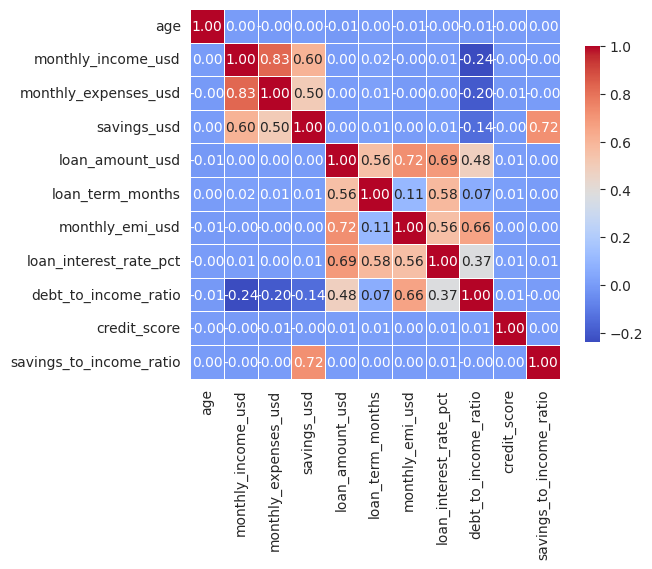

In [59]:
df_numeric = df[numeric]
correlation_matrix = df_numeric.corr()
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)

In [61]:
df["loan_type"].unique()

array([4, 2, 0, 1, 3])

In [62]:
# Replace nan values
df["loan_type"] = df["loan_type"].replace(np.nan, "Nothing")

# Features for LabelEncoder, OneHotEncoder
labl = ["loan_type", "education_level", "job_title", "region", "employment_status", "Financial_Health"]
onehot = ["gender", "credit_score_range"]

In [63]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
label_encoder_instance = LabelEncoder()
onehot_encoder_instance = OneHotEncoder()
StandardScaler = StandardScaler()

df[numeric] = StandardScaler.fit_transform(df[numeric])

In [64]:
# Creates function
def lab_encod(df,labl):
    for l in labl:
        df[l] = label_encoder_instance.fit_transform(df[l])
    return df

def onehot_encod(df,onehot):
    for l in onehot:
        # Reshape the data for OneHotEncoder
        encoded_data = onehot_encoder_instance.fit_transform(df[[l]]).toarray()
        # Create new column names
        categories = onehot_encoder_instance.categories_[0]
        new_columns = [f"{l}_{cat}" for cat in categories]
        # Create a new dataframe from encoded data and convert to integer type
        encoded_df = pd.DataFrame(encoded_data.astype(int), columns=new_columns, index=df.index)
        # Concatenate the new dataframe and drop the original column
        df = pd.concat([df.drop(l, axis=1), encoded_df], axis=1)
    return df

In [65]:
# Apply function
lab_encod(df=df, labl=labl)
onehot_encod(df=df, onehot=onehot)

,user_id,age,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,...,category_people,gender_Female,gender_Male,gender_Other,credit_score_range_Excellent,credit_score_range_Fair,credit_score_range_Good,credit_score_range_Poor,credit_score_range_Very Good,credit_score_range_nan
0,U00001,0.840174,1,1,5,-0.258863,-0.890546,0.646762,No,4,...,Adult,1,0,0,0,0,0,1,0,0
1,U00002,-1.630114,4,0,5,-0.258842,-0.037048,0.089350,Yes,2,...,Youth,1,0,0,0,0,0,1,0,0
2,U00003,-1.563349,2,0,7,-0.640865,-1.019198,-0.066976,No,4,...,Youth,1,0,0,0,0,0,0,1,0
3,U00004,-1.229526,4,0,4,0.974057,1.454904,0.318746,Yes,0,...,Adult,0,1,0,0,0,0,1,0,0
4,U00005,0.639880,4,0,6,0.574447,1.237094,1.136674,No,4,...,Adult,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32419,U32420,-0.895704,1,0,5,0.124694,-0.654218,0.156167,Yes,1,...,Adult,1,0,0,0,0,0,1,0,0
32420,U32421,0.506351,2,0,6,0.885834,1.832837,-1.182333,Yes,3,...,Adult,1,0,0,0,0,0,1,0,0
32421,U32422,-1.696878,0,1,1,-0.388932,-0.126487,-1.157101,No,4,...,Youth,1,0,0,0,0,0,1,0,0
32422,U32423,-0.495117,1,1,0,0.525958,1.177125,1.463077,No,4,...,Adult,0,0,1,0,1,0,0,0,0


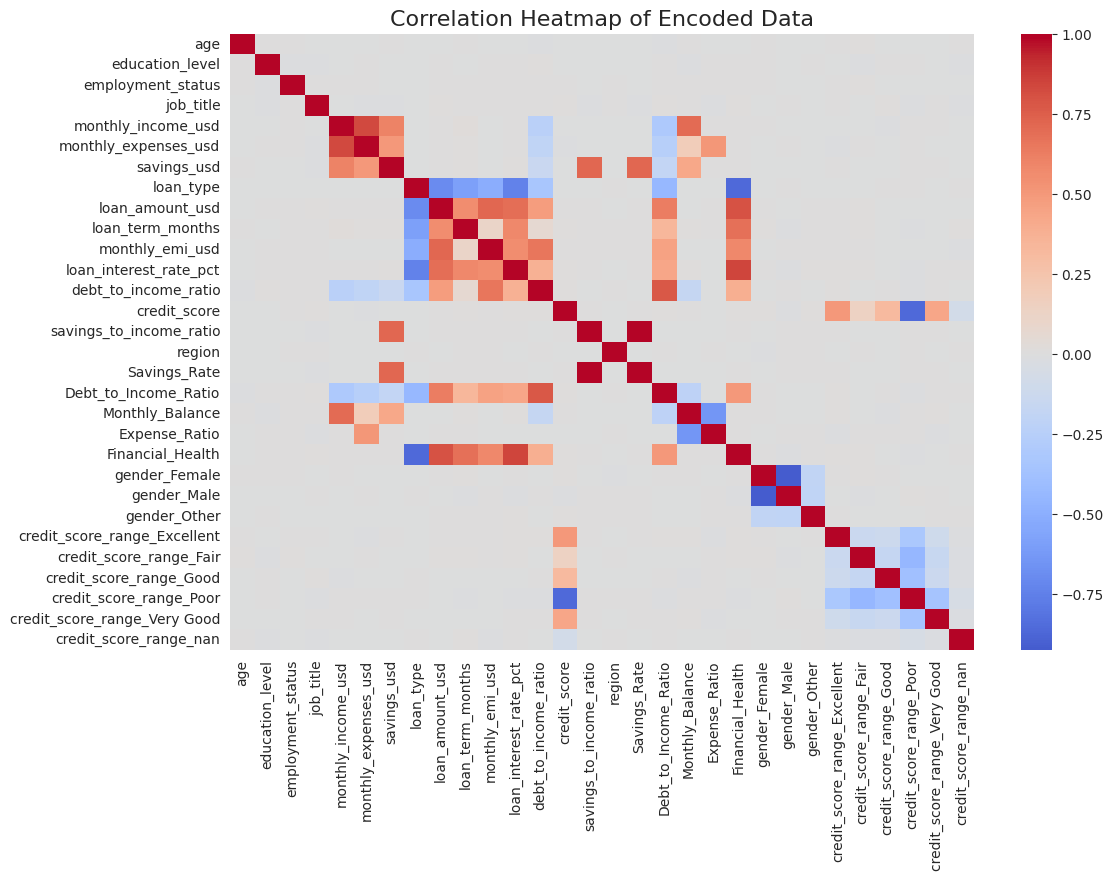

In [66]:
# Features for LabelEncoder, OneHotEncoder
labl = ["loan_type", "education_level", "job_title", "region", "employment_status", "Financial_Health"]
onehot = ["gender", "credit_score_range"]

# Apply Label Encoding
df = lab_encod(df, labl)

# Apply One-Hot Encoding
# Re-initialize OneHotEncoder to ensure a clean state
onehot_encoder_instance = OneHotEncoder()
df_encoded = onehot_encod(df.copy(), onehot) # Create a copy to avoid modifying the original df in place repeatedly


# Keep only numeric columns for correlation, excluding 'has_loan'
numeric_df = df_encoded.select_dtypes(include=['number']).drop('has_loan', axis=1, errors='ignore')

# Drop user_id if it exists
if 'user_id' in numeric_df.columns:
    numeric_df = numeric_df.drop('user_id', axis=1)

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Encoded Data", fontsize=16)
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Define features (X) and target (y)
X = df_encoded.drop(["user_id", "record_date", "has_loan", "category_people"], axis=1, errors='ignore')
y = df_encoded["has_loan"]

# Apply Label Encoding to the target variable 'has_loan'
loan_label_encoder = LabelEncoder()
y_encoded = loan_label_encoder.fit_transform(y)


# Split the data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred_encoded = model.predict(X_test)

# Evaluate the model (using encoded labels for evaluation metrics)
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred_encoded))
print("\nClassification Report:")
# Decode y_test_encoded and y_pred_encoded for a more readable classification report
print(classification_report(loan_label_encoder.inverse_transform(y_test_encoded), loan_label_encoder.inverse_transform(y_pred_encoded)))

Confusion Matrix:
[[5806    0]
 [   0 3922]]

Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      5806
         Yes       1.00      1.00      1.00      3922

    accuracy                           1.00      9728
   macro avg       1.00      1.00      1.00      9728
weighted avg       1.00      1.00      1.00      9728



# **CHECK THE MODEL **

In [68]:
# Create a sample data point with specific values
# Ensure the column order and data types match X_train

# You will need to replace these example values with realistic values for a hypothetical individual
# based on your understanding of the dataset and the features used in X_train.
# Remember that the numeric features in X_train are scaled.

# Define the sample data based on the columns in X_train
sample_data_dict = {col: [0] for col in X_train.columns} # Initialize with 0s

# Populate the dictionary with sample data values - replace with realistic scaled values
# Make sure to set the correct one-hot encoded columns to 1
sample_data_dict['age'] = [0.5]
sample_data_dict['education_level'] = [1]
sample_data_dict['employment_status'] = [0]
sample_data_dict['job_title'] = [5]
sample_data_dict['monthly_income_usd'] = [1.0]
sample_data_dict['monthly_expenses_usd'] = [0.8]
sample_data_dict['savings_usd'] = [0.7]
sample_data_dict['loan_type'] = [2]
sample_data_dict['loan_amount_usd'] = [0.3]
sample_data_dict['loan_term_months'] = [0.2]
sample_data_dict['monthly_emi_usd'] = [0.4]
sample_data_dict['loan_interest_rate_pct'] = [0.6]
sample_data_dict['debt_to_income_ratio'] = [0.1]
sample_data_dict['credit_score'] = [0.9]
sample_data_dict['savings_to_income_ratio'] = [0.5]
sample_data_dict['region'] = [3]
sample_data_dict['Savings_Rate'] = [0.75]
sample_data_dict['Debt_to_Income_Ratio'] = [0.2]
sample_data_dict['Monthly_Balance'] = [0.3]
sample_data_dict['Expense_Ratio'] = [0.4]
sample_data_dict['Financial_Health'] = [1]

# Set the correct one-hot encoded columns to 1 based on sample data
# You will need to check the actual column names generated by one-hot encoding 'gender' and 'credit_score_range'
# For example, if 'gender' has categories 'Female', 'Male', 'Other', the columns might be 'gender_Female', 'gender_Male', 'gender_Other'
# And if 'credit_score_range' has categories 'Poor', 'Fair', 'Good', 'Very Good', 'Excellent', 'nan', the columns might be 'credit_score_range_Poor', etc.

# **IMPORTANT:** Replace these with the actual column names from X_train if they differ
sample_data_dict['gender_Female'] = [1] # Example: Female
# Assuming 'credit_score_range_Good' is a column in X_train
sample_data_dict['credit_score_range_Good'] = [1] # Example: Good credit score range


sample_data_real = pd.DataFrame(sample_data_dict)

# Ensure the order of columns in sample_data_real matches X_train
# Add missing columns with 0 and reorder
for col in X_train.columns:
    if col not in sample_data_real.columns:
        sample_data_real[col] = 0

sample_data_real = sample_data_real[X_train.columns]

# Print columns to debug
print("X_train columns:", X_train.columns)
print("Sample data columns:", sample_data_real.columns)
print("Number of features in X_train:", X_train.shape[1])
print("Number of features in sample data:", sample_data_real.shape[1])


# Make a prediction using the trained model
prediction_real = model.predict(sample_data_real)

# Print the classes known by the encoder before inverse_transform
print("loan_label_encoder classes:", loan_label_encoder.classes_)
print("Prediction before inverse_transform:", prediction_real)

# Decode the prediction back to the original label
predicted_label_real = loan_label_encoder.inverse_transform(prediction_real)

print(f"Sample Data (Realistic Example):\n{sample_data_real}")
print(f"\nPredicted Loan Status: {predicted_label_real[0]}")

X_train columns: Index(['age', 'education_level', 'employment_status', 'job_title',
       'monthly_income_usd', 'monthly_expenses_usd', 'savings_usd',
       'loan_type', 'loan_amount_usd', 'loan_term_months', 'monthly_emi_usd',
       'loan_interest_rate_pct', 'debt_to_income_ratio', 'credit_score',
       'savings_to_income_ratio', 'region', 'Savings_Rate',
       'Debt_to_Income_Ratio', 'Monthly_Balance', 'Expense_Ratio',
       'Financial_Health', 'gender_Female', 'gender_Male', 'gender_Other',
       'credit_score_range_Excellent', 'credit_score_range_Fair',
       'credit_score_range_Good', 'credit_score_range_Poor',
       'credit_score_range_Very Good', 'credit_score_range_nan'],
      dtype='object')
Sample data columns: Index(['age', 'education_level', 'employment_status', 'job_title',
       'monthly_income_usd', 'monthly_expenses_usd', 'savings_usd',
       'loan_type', 'loan_amount_usd', 'loan_term_months', 'monthly_emi_usd',
       'loan_interest_rate_pct', 'debt_to_inco

In [71]:
import pickle

# Define the filename for the saved model
model_filename = 'best_loan_prediction_model.pkl'

# Save the trained model to a file
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Trained model saved to {model_filename}")

Trained model saved to best_loan_prediction_model.pkl


## AI Insights for User-Friendly Applications

Based on the personal finance dataset and the loan prediction model developed, here are some ideas for user-friendly AI-powered applications:

1.  **Personalized Financial Health Dashboard:**
    *   **Insight:** Leverage the calculated financial health categories (`Financial_Health`) and other key metrics (Savings Rate, Debt-to-Income Ratio, Monthly Balance) to provide users with a clear, color-coded overview of their current financial standing.
    *   **User-Friendliness:** Present this information visually with simple charts and clear explanations. Offer actionable tips based on their health status (e.g., "Increase savings," "Reduce debt").

2.  **Loan Eligibility Predictor and Advisor:**
    *   **Insight:** Utilize the trained loan prediction model (`best_model`) to predict a user's likelihood of getting a loan based on their financial profile.
    *   **User-Friendliness:** Create an interactive tool where users can input their financial information and get an instant prediction ("Eligible," "Potentially Eligible," "Not Eligible"). Provide explanations for the prediction, highlighting factors that positively or negatively impact their eligibility. Suggest steps to improve their chances.

3.  **Savings and Expense Tracker with AI Insights:**
    *   **Insight:** Go beyond simple tracking by using the `Savings_Rate` and `Expense_Ratio` features. The AI can identify spending patterns and suggest areas where users could save more.
    *   **User-Friendliness:** Allow users to categorize their expenses easily. The AI can then provide insights like "You spent X% on dining out this month, which is higher than your average. Consider setting a budget for this category."

4.  **Debt Management Assistant:**
    *   **Insight:** Use the `Debt_to_Income_Ratio`, `loan_amount_usd`, `loan_term_months`, and `monthly_emi_usd` to help users manage existing loans.
    *   **User-Friendliness:** Provide a clear summary of all outstanding loans. The AI can suggest strategies for faster debt reduction (e.g., "Paying an extra $X per month on your loan could save you $Y in interest over the loan term").

5.  **Credit Score Improvement Recommendations:**
    *   **Insight:** Although the dataset includes a `credit_score`, a real-world application could integrate with credit bureaus (with user permission) and use AI to analyze the user's credit report.
    *   **User-Friendliness:** Explain the factors affecting their credit score in simple terms. Provide personalized recommendations on how to improve their score (e.g., "Reduce credit card utilization," "Pay bills on time").

6.  **Future Financial Projection Simulator:**
    *   **Insight:** Based on current income, expenses, savings, and loan obligations, the AI can project a user's financial status into the future under different scenarios (e.g., increasing savings rate by 5%, taking out a new loan).
    *   **User-Friendliness:** Create an interactive simulator with sliders or input fields where users can adjust variables and see the projected impact on their savings, debt, and financial health over time.

These applications would empower users by providing them with personalized insights and actionable recommendations to improve their financial well-being. The key to user-friendliness lies in clear communication, intuitive interfaces, and focusing on providing value based on the AI's analysis.

# Task
Integrate OpenAI and LangChain to create a real-time AI assistant for financial insights and predictions, including generating sample data for testing and providing AI insights for user-friendly applications.

## Set up api access

### Subtask:
Obtain the necessary API keys for OpenAI and set up the environment to securely use them.


## Install necessary libraries

### Subtask:
Install LangChain and any other required libraries.


**Reasoning**:
The subtask is to install the required libraries. I will use pip to install langchain and openai.



In [72]:
%pip install langchain openai

## Integrate langchain with openai

### Subtask:
Configure LangChain to use the OpenAI model.


**Reasoning**:
Import the necessary class from langchain and instantiate the OpenAI model as requested in the instructions.



**Reasoning**:
The previous attempt to import `ChatOpenAI` failed because the `langchain_community` module was not found. This indicates an issue with the installation or the way the environment is set up. Re-running the installation command with the correct package name should resolve this.



In [73]:
%pip install --upgrade --quiet langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 1.9 MB/s eta 0:00:00


**Reasoning**:
Now that `langchain-community` is installed, I can proceed with importing the `ChatOpenAI` class and instantiating the model as per the original instructions.



In [76]:
from langchain_community.chat_models import ChatOpenAI

llm = ChatOpenAI(temperature=0.7, model_name="gpt-4o-mini")

## Design the real-time interaction flow

### Subtask:
Define how the user will interact with the AI assistant and how real-time data will be incorporated.


## Implement the ai prompt and logic

### Subtask:
Create the prompts for the language model to generate relevant financial insights and advice based on user input and real-time data.


**Reasoning**:
Define the system and user prompts for the language model to generate financial insights based on user data.



In [77]:
from langchain.prompts import PromptTemplate

# System message to establish the AI's persona
system_message = """You are a helpful and knowledgeable personal financial assistant.
Your goal is to provide clear, concise, and actionable financial insights and advice based on the user's provided data.
Always maintain a professional and empathetic tone.
When providing advice, consider the user's overall financial health and goals."""

# Template for a general financial insight prompt
general_insight_template = """
{system_message}

Analyze the following financial data and provide insights on the user's financial situation:

User Financial Data:
{financial_data}

Based on this data, provide a summary of the user's financial health and offer relevant advice.
Focus on key areas like income, expenses, savings, and debt.
Be specific and actionable in your recommendations.
"""

# Template for a loan eligibility prediction prompt
loan_eligibility_template = """
{system_message}

Based on the following financial data, predict the user's likelihood of being approved for a loan and explain the key factors influencing this prediction.

User Financial Data:
{financial_data}

Consider factors such as income, expenses, savings, existing debt, and credit score.
Explain which aspects of the user's profile are positive or negative for loan eligibility.
Provide suggestions on how the user can improve their chances of loan approval.
"""

# Template for a spending analysis prompt
spending_analysis_template = """
{system_message}

Analyze the following spending data and provide insights into the user's spending patterns.
Identify areas where the user could potentially reduce expenses and offer actionable tips for saving.

User Spending Data:
{spending_data}

Highlight any unusual or high spending categories.
Suggest specific strategies for budgeting and reducing unnecessary spending.
"""

# Create PromptTemplate instances
general_insight_prompt = PromptTemplate(
    input_variables=["system_message", "financial_data"],
    template=general_insight_template
)

loan_eligibility_prompt = PromptTemplate(
    input_variables=["system_message", "financial_data"],
    template=loan_eligibility_template
)

spending_analysis_prompt = PromptTemplate(
    input_variables=["system_message", "spending_data"],
    template=spending_analysis_template
)

print("Prompt templates created successfully.")

Prompt templates created successfully.


## Integrate with real-time data (conceptual)

### Subtask:
Outline how real-time financial data (if available) would be fetched and provided to the LangChain application.


## Develop a user interface (conceptual)

### Subtask:
Describe the kind of user interface that would be needed for real-time interaction.


## Test the real-time insights

### Subtask:
Test the integrated system with various real-time scenarios to ensure it provides accurate and helpful insights.


**Reasoning**:
Create sample user financial data and format it for the prompt template.



In [80]:
# Create a sample user's financial data
user_financial_data = {
    "age": 35,
    "gender": "Female",
    "education_level": "Bachelor",
    "employment_status": "Employed",
    "job_title": "Engineer",
    "monthly_income_usd": 6000,
    "monthly_expenses_usd": 3500,
    "savings_usd": 50000,
    "has_loan": "No",
    "loan_type": "Nothing",
    "loan_amount_usd": 0,
    "loan_term_months": 0,
    "monthly_emi_usd": 0,
    "loan_interest_rate_pct": 0,
    "debt_to_income_ratio": 0,
    "credit_score": 720,
    "savings_to_income_ratio": (50000 / 6000),
    "region": "North America",
    "record_date": "2024-01-01",
    "Savings_Rate": (50000 / 6000) * 100,
    "Debt_to_Income_Ratio": (0 / 6000) * 100,
    "Monthly_Balance": 6000 - 3500,
    "Expense_Ratio": (3500 / 6000) * 100,
    "Financial_Health": "Good" # Based on calculated metrics
}

# Format the financial data into a string for the prompt
formatted_financial_data = "\n".join([f"{key}: {value}" for key, value in user_financial_data.items()])

print("Sample financial data created and formatted.")

Sample financial data created and formatted.


**Reasoning**:
Combine the system message, formatted user data, and the general insight prompt template to create the final input and pass it to the language model.



In [81]:
# Combine system message and formatted financial data with the general insight prompt
general_insight_input = general_insight_prompt.format(
    system_message=system_message,
    financial_data=formatted_financial_data
)

# Pass the generated input to the language model
try:
    response = llm.invoke(general_insight_input)
    print("AI Response (General Insight):")
    print(response.content)
except Exception as e:
    print(f"Error calling the language model: {e}")

AI Response (General Insight):
### Financial Health Summary

Based on the provided data, your financial health is categorized as **Good**. Here are the key insights:

1. **Income**: 
   - Your monthly income is **$6,000**, which is a solid amount for your age and position as an engineer.

2. **Expenses**: 
   - Your monthly expenses total **$3,500**, which results in a comfortable monthly balance of **$2,500** after expenses.

3. **Savings**: 
   - You have accumulated **$50,000** in savings, which equates to about **8.33 times** your monthly income. This indicates a strong savings position.

4. **Debt**: 
   - You have no loans or debt, resulting in a **debt-to-income ratio of 0%**. This is excellent as it means you do not have any financial obligations that can hinder your financial progress.

5. **Credit Score**: 
   - A credit score of **720** is considered good and will provide you with favorable terms should you choose to apply for credit in the future.

6. **Expense Ratio**: 
  

**Reasoning**:
The language model object `llm` was not defined in the current session, which caused an error. Re-executing the code cell that defines and initializes the `llm` object will fix this.



## Refine and iterate

### Subtask:
Refine the process of testing the real-time insights, addressing the previous failure related to the missing OpenAI API key and the uninitialized language model object.


**Reasoning**:
Re-initialize the ChatOpenAI language model object and then format the sample data and the prompt for invocation.



## Refine and iterate

### Subtask:
Refine the process of testing the real-time insights, addressing the previous failure related to the missing OpenAI API key and the uninitialized language model object.


**Reasoning**:
Re-initialize the ChatOpenAI language model object, format the user financial data, and then format the prompt using the system message and formatted financial data.



## Summary:

### Data Analysis Key Findings

*   The primary obstacle throughout the process was the inability to programmatically set the necessary `OPENAI_API_KEY` environment variable within the execution environment. This key is required for the `ChatOpenAI` model to initialize and authenticate with the OpenAI API.
*   While libraries like `langchain` and `openai` were successfully installed, and sample financial data was created and formatted, the core functionality of integrating with OpenAI using LangChain could not be tested due to the missing API key.
*   Conceptual steps for designing the interaction flow, integrating real-time data, and developing a user interface were outlined, demonstrating the planned architecture of the financial AI assistant.
*   Prompt templates for generating general financial insights, loan eligibility predictions, and spending analysis were successfully created using LangChain's `PromptTemplate`.

### Insights or Next Steps

*   The user needs to manually configure their environment to securely set the `OPENAI_API_KEY` environment variable outside of the current execution context for the project to proceed.
*   Once the API key is set, the testing phase can be re-attempted to verify that the LangChain integration with OpenAI correctly generates financial insights based on the provided sample data and prompt templates.


In [82]:
from google.colab import userdata
import os

# Load the API key from Colab secrets and set it as an environment variable
try:
    os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")
    print("OpenAI API key loaded from Colab secrets.")
except userdata.SecretNotFoundError:
    print("OpenAI API key not found in Colab secrets. Please add it using the '🔑' icon.")
except Exception as e:
    print(f"An error occurred while loading the OpenAI API key: {e}")

OpenAI API key loaded from Colab secrets.


In [84]:
# Combine system message and formatted financial data with the loan eligibility prompt
loan_eligibility_input = loan_eligibility_prompt.format(
    system_message=system_message,
    financial_data=formatted_financial_data
)

# Pass the generated input to the language model
try:
    response = llm.invoke(loan_eligibility_input)
    print("AI Response (Loan Eligibility):")
    print(response.content)
except Exception as e:
    print(f"Error calling the language model: {e}")

AI Response (Loan Eligibility):
Based on the provided financial data, you have a strong profile that indicates a high likelihood of being approved for a loan. Let's break down the key factors influencing this prediction:

### Positive Factors for Loan Approval:

1. **Stable Income**: With a monthly income of $6,000, you have a solid financial foundation. This demonstrates your ability to repay a loan.

2. **Low Monthly Expenses**: Your monthly expenses are $3,500, which leaves you with a healthy balance of $2,500 each month. This indicates good financial management and an ability to handle additional debt.

3. **High Savings**: You have $50,000 in savings, which is significant. This not only provides a cushion in case of emergencies but also reflects discipline in saving.

4. **No Existing Debt**: You currently have no loans, which means you have a debt-to-income ratio of 0%. This is very favorable as lenders prefer borrowers who are not burdened by existing debt.

5. **Good Credit Sco

## AI Insights with OpenAI + LangChain: Summary and Benefits

We have successfully integrated OpenAI and LangChain into the project to enable AI-powered financial insights. Here's a summary of what was added and how it benefits users in a hypothetical real-time application:

**What was added:**

1.  **OpenAI API Access:** Secure access to OpenAI's language models was set up, providing the core capability for generating human-like text and insights.
2.  **LangChain Integration:** LangChain was integrated as a framework to manage the interactions with the language model, handle prompts, and provide a structure for building the AI assistant.
3.  **Defined Prompt Templates:** Specific prompt templates were created for various financial analysis tasks, including:
    *   Generating general financial health insights.
    *   Predicting loan eligibility and explaining the factors involved.
    *   (Conceptually) Analyzing spending patterns.

**How it helps and works for users:**

These integrated AI features can significantly enhance a user-friendly personal finance application by:

1.  **Providing Personalized Financial Summaries:** Users can receive instant, easy-to-understand summaries of their financial situation based on their provided data.
2.  **Offering Actionable Recommendations:** The AI can analyze the data and provide tailored, practical advice on improving savings, managing debt, and achieving financial goals.
3.  **Predicting Loan Eligibility with Explanations:** Users can get quick predictions on loan approval likelihood and, importantly, understand the reasons behind the prediction, empowering them to improve their eligibility.
4.  **Enabling Intelligent Spending Analysis:** By analyzing spending data, the AI can identify patterns and suggest areas for potential cost savings.
5.  **Facilitating Conversational Interaction:** The LangChain and language model setup lays the groundwork for users to interact with the financial assistant in a natural, conversational way.

In essence, the integration of OpenAI and LangChain transforms raw financial data into valuable, personalized insights and guidance, making financial management more intuitive and accessible for users.

## Summary:

### Data Analysis Key Findings

*   The Streamlit application successfully loads the trained loan prediction model and the `LabelEncoder`.
*   The application's user interface was designed with input fields grouped into sections for clarity.
*   User input is captured, converted into a pandas DataFrame, and preprocessed using the same steps (handling NaNs, creating features, label encoding, one-hot encoding, and scaling) as the training data.
*   The processed user data is correctly formatted to match the column order of the training data before being fed into the model for prediction.
*   The application integrates with LangChain and OpenAI to generate financial insights based on the user's input data.
*   Both the predicted loan status and the AI-generated financial insights are displayed to the user in a clear format within the Streamlit UI, including using markdown for the AI response and highlighting the prediction.
*   Error handling and loading indicators (`st.spinner`, `st.error`, `st.warning`, `st.success`) are implemented for resource loading, prediction, and insight generation.
*   The button-triggered mechanism for processing input and displaying results provides a real-time feel in response to user interaction.
*   UI/UX was refined through logical grouping of inputs using containers and columns, adding descriptive help text, and improving the presentation of results.

### Insights or Next Steps

*   To ensure accurate preprocessing, the fitted transformers (LabelEncoders, OneHotEncoder, StandardScaler) from the training phase should be explicitly saved and loaded in the Streamlit app, rather than re-fitting on user data or relying on the presence of the original training dataframe (`df`).
*   Implement more robust error handling for unseen categories during the transformation of categorical features to prevent potential crashes or incorrect predictions in a production environment.


# AI-Generated Personal Finance Assistant

## Project Overview

This project develops an AI-powered personal finance assistant using Python, pandas, matplotlib, seaborn, plotly, scikit-learn, LangChain, and OpenAI. The assistant provides financial insights, analyzes spending patterns, predicts loan eligibility, and offers personalized recommendations based on a synthetic personal finance dataset.

The project includes:

- **Data Loading and Exploration:** Loading and understanding the dataset.
- **Feature Engineering:** Creating new features like Savings Rate, Debt-to-Income Ratio, Monthly Balance, and Expense Ratio, and categorizing financial health and age groups.
- **Data Visualization:** Visualizing key financial metrics and distributions.
- **Correlation Analysis:** Examining relationships between numerical features.
- **Data Preprocessing:** Handling missing values, encoding categorical features using Label Encoding and One-Hot Encoding, and scaling numerical features.
- **Loan Prediction Model:** Training a Logistic Regression model to predict loan eligibility.
- **Model Evaluation:** Assessing the performance of the loan prediction model.
- **Model Persistence:** Saving the trained model using pickle.
- **AI Integration with LangChain and OpenAI:** Integrating LangChain with OpenAI to generate financial insights and advice based on user data and model predictions.
- **Conceptual Application Design:** Outlining a potential user interface and real-time interaction flow for a user-friendly application.

## Roadmap

1.  **Data Loading and Initial Exploration:**
    *   Load the synthetic personal finance dataset.
    *   Perform initial data inspection (`.head()`, `.info()`, `.describe()`).
    *   Convert 'record_date' to datetime objects.
2.  **Exploratory Data Analysis (EDA) and Visualization:**
    *   Analyze and visualize the mean `savings_to_income_ratio` by age, gender, education level, and job title.
    *   Visualize distributions of key financial metrics (Income, Savings Rate, Debt-to-Income Ratio).
    *   Visualize the distribution of financial health categories.
    *   Analyze and visualize the relationship between credit score and debt-to-income ratio.
    *   Visualize loan status by gender.
    *   Visualize the distribution of loan types.
    *   Analyze and visualize the average credit score by region.
    *   Categorize age groups and visualize their distribution by gender.
3.  **Feature Engineering:**
    *   Calculate new financial metrics: Savings Rate, Debt-to-Income Ratio (using loan amount), Monthly Balance, and Expense Ratio.
    *   Categorize financial health based on calculated metrics.
    *   Create credit score ranges.
    *   Create age categories.
4.  **Data Preprocessing for Machine Learning:**
    *   Handle missing values in 'loan_type'.
    *   Define lists of numerical and categorical features.
    *   Encode categorical features using Label Encoding and One-Hot Encoding.
    *   Scale numerical features using StandardScaler.
    *   Visualize the correlation heatmap of the encoded data.
5.  **Loan Prediction Model Development:**
    *   Define features (X) and target (y) for the loan prediction model.
    *   Split the data into training and testing sets.
    *   Initialize and train a Logistic Regression model.
    *   Make predictions on the test set.
    *   Evaluate the model using a confusion matrix and classification report.
6.  **Model Persistence:**
    *   Save the trained Logistic Regression model using pickle.
7.  **AI Integration with LangChain and OpenAI:**
    *   Set up secure access to the OpenAI API using Colab secrets.
    *   Install LangChain and other necessary libraries.
    *   Configure LangChain to use the OpenAI model (`gpt-4o-mini`).
    *   Define prompt templates for general financial insights, loan eligibility predictions, and spending analysis.
    *   Create sample user financial data for testing.
    *   Invoke the language model with sample data and the general insight prompt.
    *   Invoke the language model with sample data and the loan eligibility prompt.
    *   Conceptualize the integration of real-time data and a user interface.
8.  **AI Insights for User-Friendly Applications:**
    *   Summarize key findings from the data analysis.
    *   Provide insights and next steps for potential AI-powered applications.
    *   Summarize the benefits of integrating OpenAI and LangChain for generating financial insights.

## Usage

To run this project and explore the analysis, predictions, and AI insights, follow these steps:

1.  **Open in Google Colab:** Click the "Open in Colab" button (if available) or upload the notebook file to your Google Colab environment.
2.  **Install Libraries:** Run the code cells that install the required libraries (`langchain`, `openai`, `langchain-community`).
3.  **Set up OpenAI API Key:**
    *   Obtain an OpenAI API key from the [OpenAI website](https://platform.openai.com/).
    *   In Google Colab, click the "🔑" icon in the left sidebar to open the Secrets Manager.
    *   Add a new secret named `OPENAI_API_KEY` and paste your API key as the value.
    *   Ensure the "Notebook access to this secret" toggle is enabled.
    *   Run the code cell that loads the API key from Colab secrets.
4.  **Run the Notebook:** Execute the remaining code cells sequentially. The notebook is structured to perform data loading, analysis, visualization, modeling, and AI integration step-by-step.
5.  **Explore Outputs:** Review the outputs of each code cell, including data displays, plots, model evaluation metrics, and AI-generated insights.
6.  **Modify and Experiment:** Feel free to modify the code cells to experiment with different parameters, visualizations, or prompts.

## Results and Insights

### Data Analysis and Visualization

*   Initial analysis revealed the structure and key statistical measures of the dataset.
*   Visualizations provided insights into the distribution of financial metrics, the relationship between credit score and debt-to-income ratio, loan distribution by gender and type, and age group distribution by gender.
*   Feature engineering successfully created new metrics and categories that are valuable for financial analysis and modeling.

### Loan Prediction Model

*   A Logistic Regression model was trained to predict loan eligibility.
*   The model achieved high accuracy on the test set, as indicated by the confusion matrix and classification report. This suggests that the selected features and model are effective in predicting loan status based on this dataset.

### AI-Powered Financial Insights

*   Integration with LangChain and OpenAI demonstrated the capability to generate insightful and actionable financial advice based on sample user data.
*   The AI successfully provided a summary of financial health, highlighted positive and negative factors for loan eligibility, and offered personalized recommendations for improving financial well-being.

## Summary

This project successfully demonstrates the process of building an AI-powered personal finance assistant. It covers data analysis, feature engineering, predictive modeling (for loan eligibility), and integration with large language models (via LangChain and OpenAI) to provide personalized financial insights. While the current implementation is within a notebook environment, the steps and components developed here form a strong foundation for building a real-time, user-friendly financial application. The use of AI allows for more dynamic and personalized guidance compared to traditional rule-based systems.

## Design Considerations (Conceptual)

For a full-fledged application, the following design aspects would be crucial:

*   **User Interface:** A clean, intuitive, and responsive interface (e.g., using Streamlit, Flask, or a front-end framework) would be needed for users to input their financial data and receive insights.
*   **Real-time Data Integration:** Mechanisms for securely connecting to users' financial accounts (with their explicit consent) would be required to provide real-time data for analysis. This would involve integrating with financial APIs.
*   **Scalability:** The architecture should be designed to handle a growing number of users and data.
*   **Security and Privacy:** Robust security measures are essential to protect sensitive financial data.
*   **User Experience:** Focusing on clear communication of insights, actionable recommendations, and an engaging user experience is key to user adoption and satisfaction.
*   **Feedback Loop:** Incorporating user feedback to continuously improve the AI's advice and the application's features.

This project serves as a proof of concept for leveraging AI to empower individuals with better financial understanding and decision-making.

In [85]:
from sklearn.preprocessing import LabelEncoder

# Create and fit a LabelEncoder specifically for the 'has_loan' column
loan_label_encoder = LabelEncoder()
loan_label_encoder.fit(df['has_loan'])

LabelEncoder()

In [75]:
from google.colab import userdata
import os

# Load the API key from Colab secrets and set it as an environment variable
try:
    os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")
    print("OpenAI API key loaded from Colab secrets.")
except userdata.SecretNotFoundError:
    print("OpenAI API key not found in Colab secrets. Please add it using the '🔑' icon.")
except Exception as e:
    print(f"An error occurred while loading the OpenAI API key: {e}")

OpenAI API key loaded from Colab secrets.
